## dogs-vs-cats
### pandas df loads data

In [10]:
import os
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from utils.data_utils import data_generators

In [2]:
# data path
competition_name = "dogs-vs-cats-redux-kernels-edition"
data_dir = os.path.expanduser(
    f"~/.kaggle/competitions/{competition_name}")

In [3]:
# Prepare DataFrame
filenames = os.listdir(os.path.join(data_dir, "train"))
np.random.shuffle(filenames)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    elif category == 'cat':
        categories.append(0)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

        filename category
0   dog.9634.jpg      dog
1   dog.3941.jpg      dog
2  cat.10838.jpg      cat
3    cat.107.jpg      cat
4   dog.8804.jpg      dog
           filename category
24995  cat.8923.jpg      cat
24996  dog.2875.jpg      dog
24997  cat.9903.jpg      cat
24998  cat.6319.jpg      cat
24999   cat.598.jpg      cat


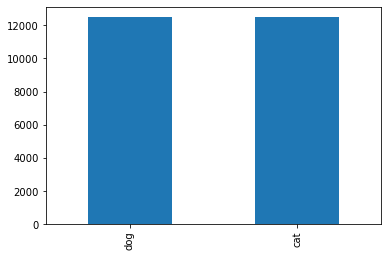

In [4]:
print(df.head())
print(df.tail())
df['category'].value_counts().plot.bar()
plt.show()

In [8]:
# Input parameters
IMAGE_WIDTH = IMAGE_HEIGHT = 128
image_size = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
num_classes = 2

batch_size = 32

# Data loaders
train_generator, validation_generator = data_generators(
    data_dir, target_size=image_size, batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


sample name: cat.8319.jpg


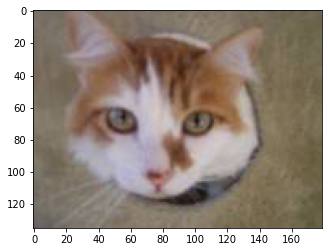

In [11]:
# Show sample image
sample = np.random.choice(filenames)
print(f"sample name: {sample}")
img = image.load_img(os.path.join(data_dir, "train", sample))
plt.imshow(img)
plt.show()

In [13]:
img.size

(179, 135)